# **Linear Reggretion**

Pada studi kasus ini, kita ingin memprediksi harga properti berdasarkan luas bangunan. Intuisi dasarnya sederhana: semakin luas suatu bangunan, maka harganya cenderung lebih tinggi. Namun, besarnya peningkatan harga per meter persegi tidak selalu sama inilah yang ingin kita tangkap dengan model regresi.

**Import Library**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

**Membaca File**

In [ ]:
df = pd.read_csv("/content/prediksi_regresi linear.csv")
print(df.head())

   ID Kecamatan  Luas_Bangunan  Harga_Properti
0   1         C            152          1795.0
1   2         C            229          2525.0
2   3         D            142          1730.0
3   4         B             64           985.0
4   5         D            156          1935.0


**Pisahkan fitur (X) dan target (y)**

In [ ]:
X = df[["Luas_Bangunan"]].values
y = df["Harga_Properti"].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

**Latih Model**

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

**parameter model**

In [ ]:
intercept  = model.intercept_
koefisien  = model.coef_[0]
print("Intersep: ", intercept)
print("Koefisien: ", koefisien)

Intersep:  262.4304304361217
Koefisien:  10.210960834281


**RUN MODEL DAN EVALUASI (TRAIN & TEST)**

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred  = model.predict(X_test)

df_y_test_pred = pd.DataFrame({
    "Luas_Bangunan_test": X_test.flatten(),
    "Harga_Properti_test": y_test,
    "Prediksi_Harga_test": np.round(y_test_pred)
})
display(df_y_test_pred)

,Luas_Bangunan_test,Harga_Properti_test,Prediksi_Harga_test
0,241,2825.0,2723.0
1,51,850.0,783.0
2,95,1245.0,1232.0
3,192,2335.0,2223.0
4,120,1415.0,1488.0
...,...,...,...
95,76,1065.0,1038.0
96,97,1320.0,1253.0
97,103,1330.0,1314.0
98,239,2650.0,2703.0


**Hitung metrik evaluasi**

In [ ]:
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

print("\n=== HASIL EVALUASI ===")
print(f"[TRAIN] MSE : {mse_train:.3f} | RMSE: {rmse_train:.3f} | R²: {r2_train:.4f}")
print(f"[TEST ] MSE : {mse_test:.3f} | RMSE: {rmse_test:.3f} | R²: {r2_test:.4f}")


=== HASIL EVALUASI ===
[TRAIN] MSE : 6598.709 | RMSE: 81.232 | R²: 0.9810
[TEST ] MSE : 7849.009 | RMSE: 88.595 | R²: 0.9779


**PLOT: SCATTER TEST + GARIS REGRESI**

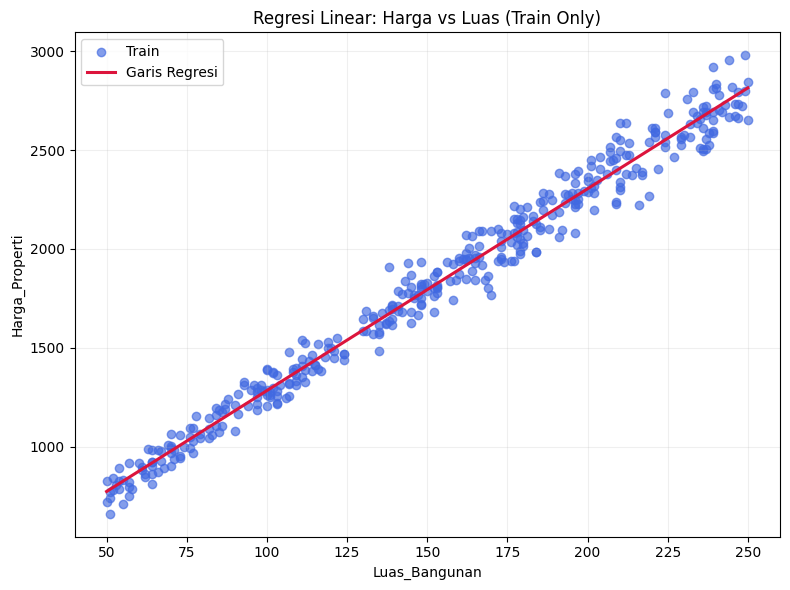

In [ ]:
# ===== PLOT: HANYA TRAIN + GARIS REGRESI =====
order_train = np.argsort(X_train[:, 0])
X_train_sorted = X_train[order_train]
y_train_pred_sorted = y_train_pred[order_train]

plt.figure(figsize=(8, 6))

# Titik train (biru)
plt.scatter(X_train, y_train, color="royalblue", alpha=0.65, label="Train")

# Garis regresi dari model
plt.plot(X_train_sorted, y_train_pred_sorted, color="crimson", linewidth=2.2, label="Garis Regresi")

plt.xlabel("Luas_Bangunan")
plt.ylabel("Harga_Properti")
plt.title("Regresi Linear: Harga vs Luas (Train Only)")
plt.legend()
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()


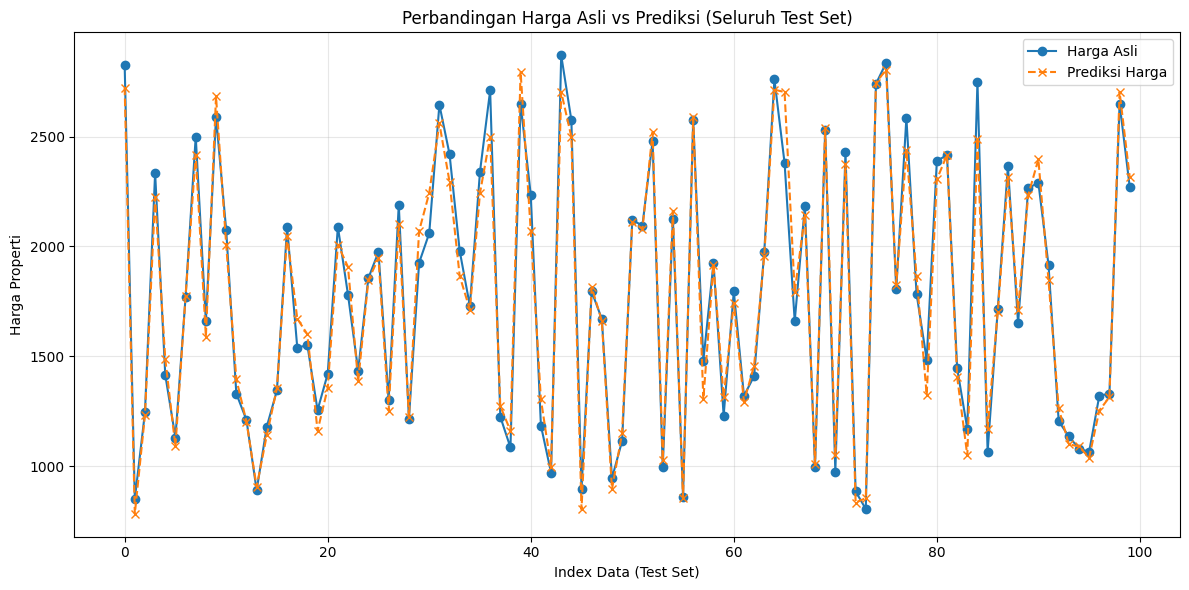

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test, label="Harga Asli", marker="o", linestyle="-")
plt.plot(y_test_pred, label="Prediksi Harga", marker="x", linestyle="--")
plt.xlabel("Index Data (Test Set)")
plt.ylabel("Harga Properti")
plt.title("Perbandingan Harga Asli vs Prediksi (Seluruh Test Set)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


**PREDIKSI UNTUK NILAI BARU**

In [ ]:
X_new = np.array([[60],[75],[90],[120],[150],[200]], dtype=float)
y_new_pred = model.predict(X_new)

df_new = pd.DataFrame({
    "Luas_Bangunan": X_new.flatten(),
    "Prediksi_Harga": np.round(y_new_pred, 2)
})
print("\n=== PREDIKSI NILAI BARU ===")
print(df_new.to_string(index=False))


=== PREDIKSI NILAI BARU ===
 Luas_Bangunan  Prediksi_Harga
          60.0          875.09
          75.0         1028.25
          90.0         1181.42
         120.0         1487.75
         150.0         1794.07
         200.0         2304.62


After uploading the file, you can modify the code to read it using the correct path. If you uploaded the file named `prediksi_regresi linear.csv`, the path in Colab will be `/content/prediksi_regresi linear.csv`.

In [ ]:
df = pd.read_csv("/content/prediksi_regresi linear.csv")
print(df.head())

   ID Kecamatan  Luas_Bangunan  Harga_Properti
0   1         C            152          1795.0
1   2         C            229          2525.0
2   3         D            142          1730.0
3   4         B             64           985.0
4   5         D            156          1935.0
